# Diabetes Prediction

In [1]:
#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# #ML Library
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
# Step 3: Identify categorical columns
categorical_columns = ['gender', 'smoking_history',]

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [6]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


In [7]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [8]:
# Step 4: Define your target column (y) and drop it from the DataFrame to get features (X)

target_column = 'diabetes'  # target column name
y = df['diabetes']
X = df.drop(columns=['diabetes'])

In [9]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



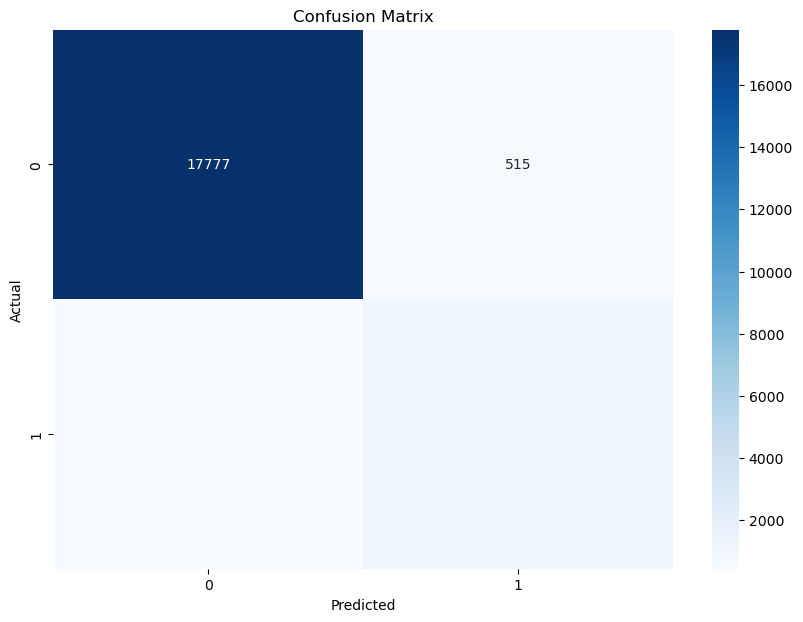

In [10]:
# Step 6: Train a Decision Tree classifier on the training data
DT_clf = DecisionTreeClassifier(random_state=42)
DT_clf.fit(X_train, y_train)

# Step 7: Evaluate the classifier on the testing data
y_pred = DT_clf.predict(X_test)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 9: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10a: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10b: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=DT_clf.classes_, yticklabels=DT_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This shows 95% of accuracy with 17777 true positive in 18292 support data.

# Random Forest

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



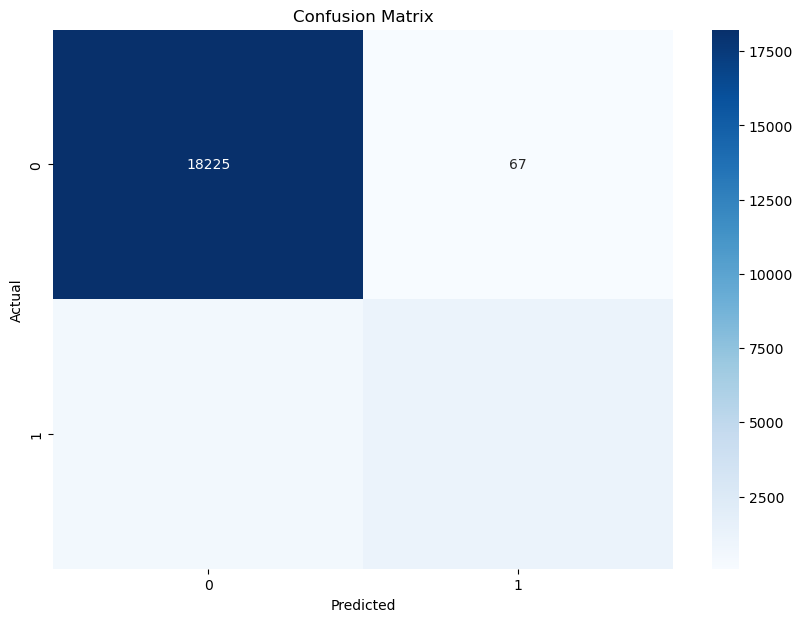

In [11]:
from sklearn.ensemble import RandomForestClassifier


# Step 6: Train a Random Forest classifier on the training data
RF_clf = RandomForestClassifier(random_state=42)
RF_clf.fit(X_train, y_train)

# Step 7:Evaluate the classifier on the testing data
y_pred = RF_clf.predict(X_test)

# Step 8:Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 69 Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10a:Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10b: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=RF_clf.classes_, yticklabels=RF_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This shows 97% of accuracy.

In [12]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(RF_clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Score:", cv_scores.mean())

Cross-Validation Scores: [0.97005 0.97085 0.9676  0.9703  0.9704 ]
Mean Score: 0.9698399999999999


# SVM

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18292
           1       1.00      0.38      0.55      1708

    accuracy                           0.95     20000
   macro avg       0.97      0.69      0.76     20000
weighted avg       0.95      0.95      0.94     20000



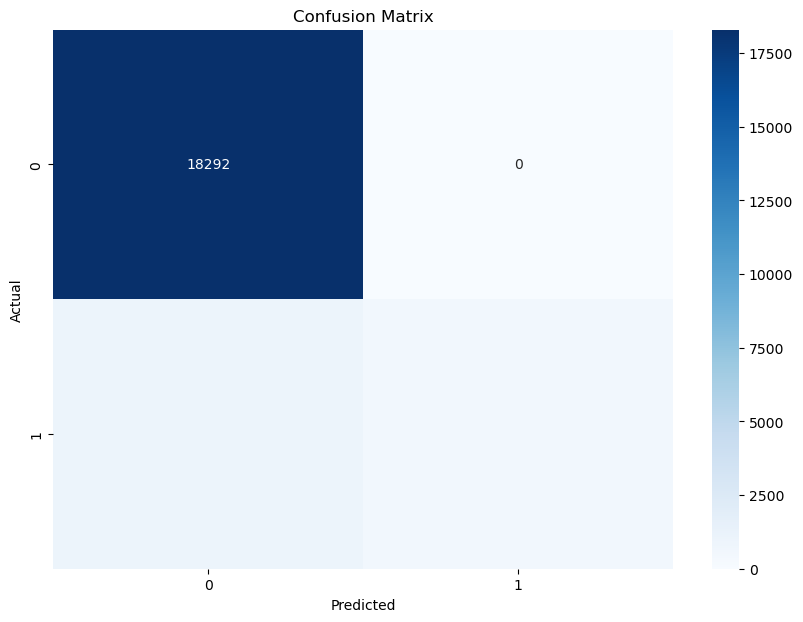

In [13]:
from sklearn.svm import SVC

# Step 6: Train an SVM classifier on the training data
SVM_clf = SVC(probability=True, random_state=42)
SVM_clf.fit(X_train, y_train)

# Step 7: Evaluate the classifier on the testing data
y_pred = SVM_clf.predict(X_test)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Step 9: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Step 10a: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Step 10b: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=SVM_clf.classes_, yticklabels=SVM_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.89      0.53      0.67      1708

    accuracy                           0.95     20000
   macro avg       0.92      0.76      0.82     20000
weighted avg       0.95      0.95      0.95     20000



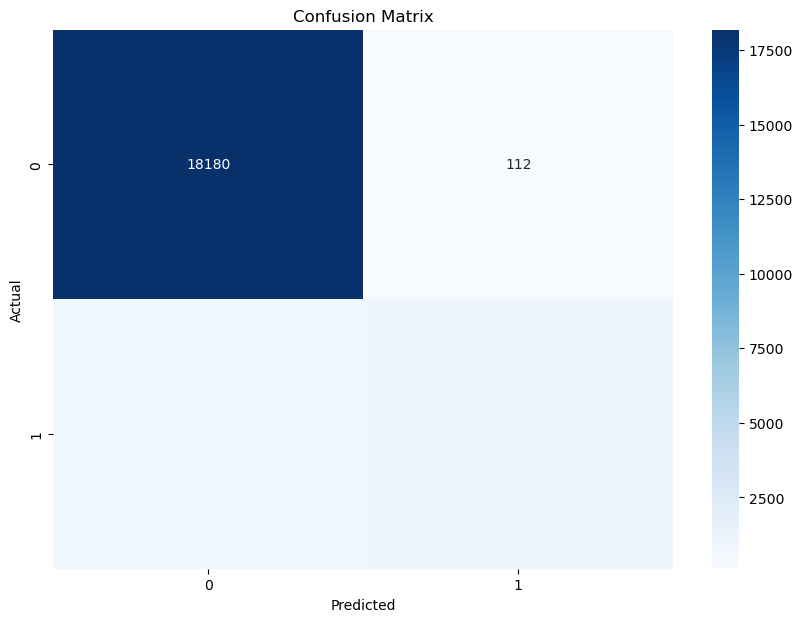

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Step 6; Train a KNN classifier on the training data
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(X_train, y_train)

# Step 7;Evaluate the classifier on the testing data
y_pred = KNN_clf.predict(X_test)

# Step 8;Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 9;Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10a;Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10bb: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Based on the above models, Random forest shows 97% of accuracy and SVM shows 95% of accuracy with 0 false positive.